In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from imblearn.over_sampling import SMOTE
import joblib

In [139]:
# 2. Chargement des données
df = pd.read_csv(r'C:\Users\HP\Documents\csv\Kag_happiness_indicators.csv')
# Initial exploration
print(df.head()) #c'est pour afficher les 5 premieres ligne 
print(df.info()) # c'est pour afficher  le nombre des colonnes et les lignes et le  type de chaque colonne d'apres le dataframe
 

   Unnamed: 0  year          workstat  prestige divorce widowed  educ  \
0           1  1994     keeping house      46.0     NaN     iap  12.0   
1           2  1994  working fulltime      22.0      no     iap  12.0   
2           3  1994  working fulltime      29.0      no     iap  12.0   
3           4  1994  working fulltime      42.0     yes     iap   8.0   
4           5  1994  working parttime      36.0     NaN     NaN  13.0   

             reg16  babies  preteen  ...  occattend regattend y94 y96 y98 y00  \
0  middle atlantic     2.0      3.0  ...        1.0       0.0   1   0   0   0   
1          foreign     0.0      0.0  ...        0.0       0.0   1   0   0   0   
2          foreign     0.0      0.0  ...        0.0       1.0   1   0   0   0   
3          foreign     0.0      0.0  ...        0.0       0.0   1   0   0   0   
4  middle atlantic     0.0      1.0  ...        0.0       0.0   1   0   0   0   

   y02  y04  y06  unem10  
0    0    0    0     1.0  
1    0    0    0    

In [140]:
print(df.describe()) #afficher les statistiques des colonnes numeriquesd'apres le data frame comme le moyenne 
#l'ecart type et les valeurs ,inimale ,maximal les quartiles 


         Unnamed: 0          year      prestige          educ        babies  \
count  17137.000000  17137.000000  16283.000000  17093.000000  17036.000000   
mean    8569.000000   1999.474120     43.877541     13.319078      0.207091   
std     4947.170117      4.143358     13.873965      2.986785      0.540542   
min        1.000000   1994.000000     17.000000      0.000000      0.000000   
25%     4285.000000   1996.000000     33.000000     12.000000      0.000000   
50%     8569.000000   1998.000000     43.000000     13.000000      0.000000   
75%    12853.000000   2004.000000     51.000000     16.000000      0.000000   
max    17137.000000   2006.000000     86.000000     20.000000      6.000000   

            preteen         teens       tvhours        vhappy    mothfath16  \
count  17036.000000  17049.000000  11794.000000  17137.000000  17132.000000   
mean       0.255753      0.181360      2.904019      0.306938      0.692972   
std        0.621533      0.493698      2.327457    

In [141]:
# Check for missing values
print(df.isnull().sum())


Unnamed: 0         0
year               0
workstat           3
prestige         854
divorce         7383
widowed         6041
educ              44
reg16              0
babies           101
preteen          101
teens             88
income          2092
region             0
attend           273
happy              0
owngun          5840
tvhours         5343
vhappy             0
mothfath16         5
black              0
gwbush04       15207
female             0
blackfemale        0
gwbush00       13701
occattend        273
regattend        273
y94                0
y96                0
y98                0
y00                0
y02                0
y04                0
y06                0
unem10          5796
dtype: int64


happy
pretty happy     9791
very happy       5260
not too happy    2086
Name: count, dtype: int64


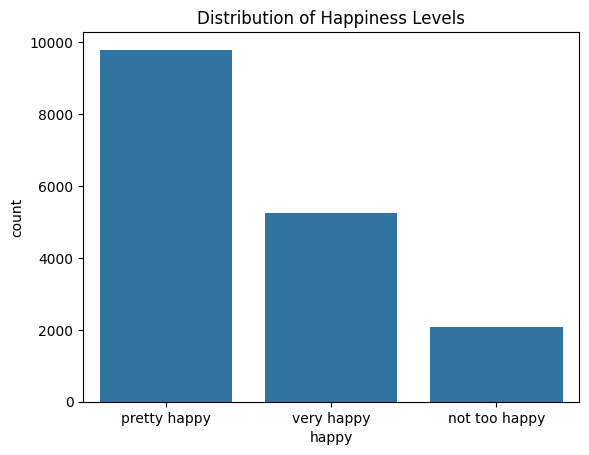

happy_binary
1    15051
0     2086
Name: count, dtype: int64


In [142]:
# Explore the target variable 'happy'
print(df['happy'].value_counts()) #compte les valeurs unique pour chaque d'occurance
sns.countplot(x='happy', data=df) # la fonction sns.countplot permet d'afficher un graphique pour visualiser la distribution des valeurs different de la variable happy not happy et very happy
plt.title('Distribution of Happiness Levels') # permet juste d'aaficher un titre au debut de graphe 
plt.show()

# conversion  de la variable heppy en  binaire  
df['happy_binary'] = df['happy'].apply(lambda x: 1 if x in ['very happy', 'pretty happy'] else 0)
print(df['happy_binary'].value_counts())
#si par exemple la vleur very happy ou bien pretty happy donne la valeur 0 si la valeur not happy on donne la valeur 0

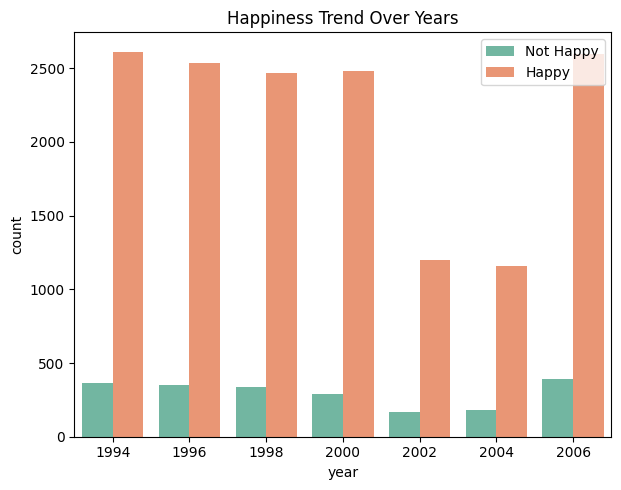

In [143]:
# Happiness by year (if multiple years exist)
plt.figure(figsize=(18, 5))
if 'year' in df.columns:
    plt.subplot(1, 3, 3)
    sns.countplot(x='year', hue='happy_binary', data=df, palette='Set2')
    plt.title('Happiness Trend Over Years')
    plt.legend(['Not Happy', 'Happy'])

plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_924\4102356228.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='divorce', y='happy_binary', data=temp_df, palette='viridis')


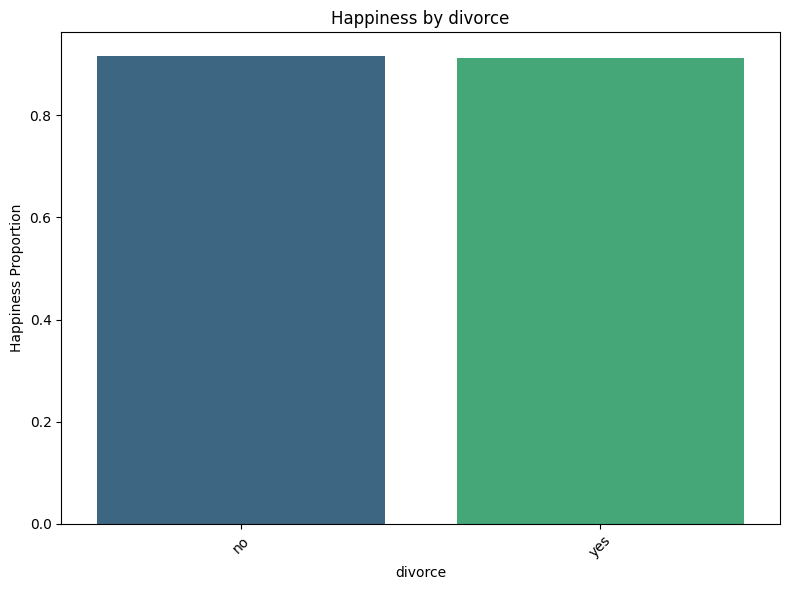

In [144]:
plt.figure(figsize=(8, 6))

if 'divorce' in df.columns:
    temp_df = df.groupby('divorce')['happy_binary'].mean().reset_index()
    sns.barplot(x='divorce', y='happy_binary', data=temp_df, palette='viridis')
    plt.title('Happiness by divorce')
    plt.xticks(rotation=45)
    plt.ylabel('Happiness Proportion')
    plt.tight_layout()
    plt.show()